# Histograms

> ⚠️ Please, if you barely know how to plot, I encourage you to see the *0. Basic_intro* notebook and the **Plot folder**  first. Basic things like what a figure and an axis is, that have already been discussed in the **Plot folder** will not be seen here.

Histograms are a very useful and used graphs in statistics. We can determine whether some data follows a normal distribution (or any other distribution) by just looking at the histogram. 

Even though there are some cases that it is not very clear what distribution our data has and we might need to do some **no-parametric test** to make some hypothesis, the histogram graph gives you a very quick idea of how your data might be distributed.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Table of contents

[1. What are the bins?](#bins)<br>

[2. All bins must be the same length](#length)<br>

[3. Return of plt.hist()](#ret)<br>

[4. Plotting the density function (PDF)](#pdf)
- [Discrete PDF](#dpdf)

[5. Cumulative Distribution Function (CDF)](#cdf)
- [With density = False](#dfcdf)
- [With density = True](#dtcdf)<br>

[6. Other parameters](#OP)
- [range](#range)
- [width, rwidth & color](#wrc)
- [Kwargs](#kwargs)
- [stacked](#stacked)<br>

[7. Labels](#labels)
- [Legend labels](#llabels)
- [Bar labels](#blabels)<br>

[8. Line Chart underlying histogram data](#linechart)<br>

[9. Marking the mean](#mark)

## <a id = 'bins'> What are the bins?</a>
A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin.

Bins are also sometimes called "intervals", "classes", or "buckets".

**Example** : I'm going to create **10.000** random heights that will follow a normal distribution of $\mu = 180\text{cm}$ and a $\sigma = 15\text{cm}$. I'm going to group these heights in 5 groupt. The lenght of these groups (or intervals or bins) will depend on the max and min value of our distribution. e.g. if the min value of our random data is 150cm and the max 200, the intervals will have a lenght of 10 each. 

- I am going to have 5 groups of a length of 10 cm each.
- The lenght of the interval|s can be calculated with the next formula:
<br><br>

$$ Length_{interval} = \frac{Max_{value} - Min_{value}} {NumIntervals} $$

<br>

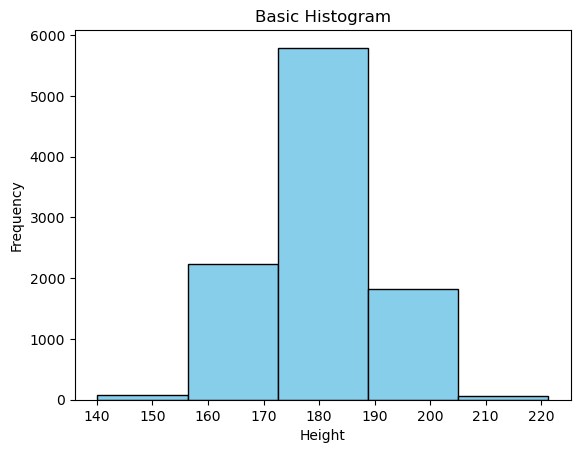

In [26]:
# the height will follow a normal distribution

# creating generator of a normal distribution with some mean and std
generator = np.random.default_rng()

#Generating data from generator
mean = 180
std = 10 
random_heights = generator.normal(mean, std, size = 10000)

#defining number of groups in which I'm going to group my data
num_bins = 5

a = plt.hist(random_heights, bins=num_bins, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

### <a id = 'length'>All bins must be the same lenght?</a>
It depends on how you are passing this variable:
- If you are passing it as an integer (like we did in the above example), then all the intervals are going to be the same length.


- If you are passing it as a sequence (list) than, you can customize the length of each bin.

>**Note**: If you are passing the bin as a sequence, all but the last (righthand-most) bin are half-open. In other words, if my sequence is `[1, 2, 3 ,4]`, then the first bin will be `[1,2)`. All the bins will be half-open except the last one that will be closed: `[3,4]` in this case.

>**Note**: If you are passing a sequence, in order to have *$n$* bins, your sequence must have *$n+1$* lenght (positions).

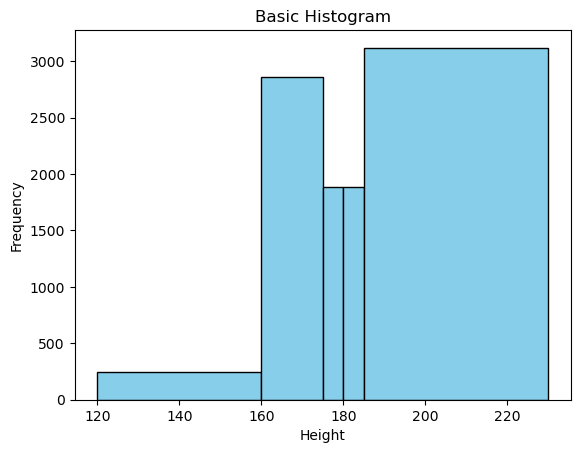

In [27]:
# Example with bins as a sequence, rather that an integer,

# creating generator of a normal distribution with some mean and std
generator = np.random.default_rng()

#Generating data from generator
mean = 180
std = 10 
random_heights = generator.normal(mean, std, size = 10000)

# no-sense-sequence. Just to see the example
num_bins = [120, 160, 175, 180, 185, 230]

plt.hist(random_heights, bins=num_bins, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

## <a id = 'ret'> Return of plt.hist()</a>
When you plot `plt.hist()`, it returns a tuple with 3 things:
- `c` which are the counts
- `b` which are the bins
- `p` which are the patches (the histogram object). This can be used to place some labels as we'll see [here](#blabels)

`c` and `b` are the two most important ones and the ones we are going to focus on.

>**Note**: `c` and `b` is just a standard way to call *counts* and *bins* respectively.

These are the counts[  80. 1913. 5468. 2377.  162.]

These are the bins[141.46323203 156.46936625 171.47550048 186.4816347  201.48776893
 216.49390315]


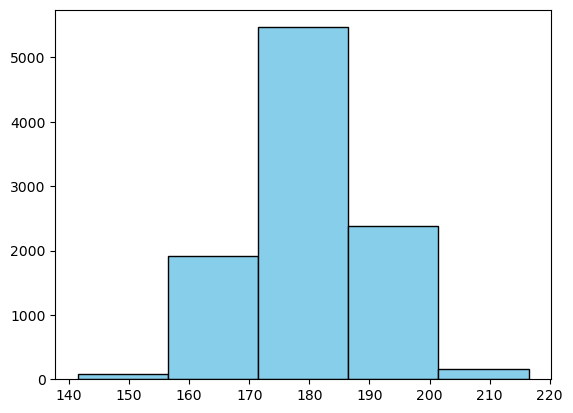

In [28]:
# Taking the first example to see this

# the height will follow a normal distribution

# creating generator of a normal distribution with some mean and std
generator = np.random.default_rng()

#Generating data from generator
mean = 180
std = 10 
random_heights = generator.normal(mean, std, size = 10000)

#defining number of groups in which I'm going to group my data
num_bins = 5

c, b, _= plt.hist(random_heights, bins=num_bins, color='skyblue', edgecolor='black')

print(f'These are the counts{c}\n')
print("These are the bins{}".format(b))

<br><br>
- `c` are the number of data corresponding to a certain group. 


- `b` shows the start and  endpoint of each interval (The endpoint of an interval is the starpoint of the next one).

### <a id = 'pdf'>Plotting the density function (PDF)

#### <a id = 'dpdf'>Discrete PDF</a>
The `c` variable is great to plot a PDF (Probability Density Function) for discrete distributions.

- The PDF shows the probability of belonging to a certain group. We see from the above plot, that a person is more likely to be roughly between 171cm and 187cm tall (i.e 3rd group) than to be between 203cm and 219cm (i.e 5th group). 
- The 3rd group is going to have the biggest probability of all. 
- The sum of the probabilities of all the groups must be one (If we suppose a person cannot be smaller than 138cm nor taller than 219cm which are the min and max of our distribution).

<br>

With that said, the probability of each group can be obtained dividing the count of each group by the total count (trivial).

$$ \frac {count_{i}}{TotalCounts}  1 \le i \le Num_{groups}$$

- $i$ representing each group.

['[141, 156]', '[156, 171]', '[171, 186]', '[186, 201]', '[201, 216]']


<Figure size 640x480 with 0 Axes>

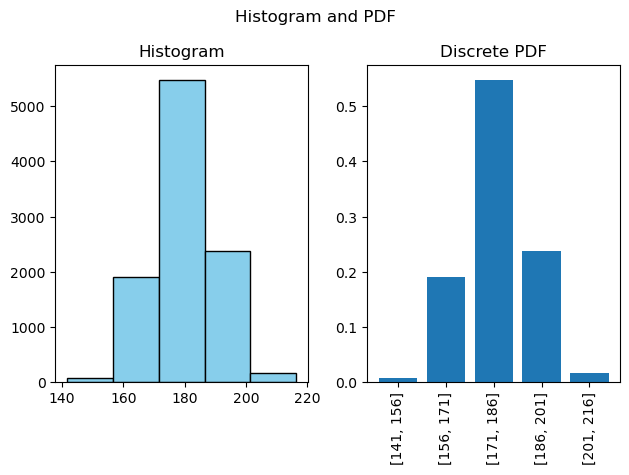

In [29]:
# Plot the density function

prob_each_group = c / len(random_heights)
labels = list()

#for to convert the intervals to strings to pass it as x-axis labels to the plt.bar()
for i, value in enumerate(b[:-1]):
    interval_min = str(int(value))
    interval_max = str(int(b[i+1]))
    labels.append('[{}, {}]'.format(interval_min, interval_max))
    
print(labels)

fig = plt.figure()
fig, ax = plt.subplots(nrows = 1, ncols = 2, tight_layout = True)

ax[0].hist(random_heights, bins=num_bins, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram')

ax[1].set_title('Discrete PDF')
ax[1].set_xticks(np.arange(0, len(labels)), labels, rotation = 'vertical')
ax[1].bar(labels, height = prob_each_group)
fig.suptitle('Histogram and PDF')

plt.show()

In [30]:
# the sum, as we said (property of PDF must be = 1)
sum(prob_each_group)

1.0

## <a id = 'cdf'>Cumulative Distribution Function (CDF)</a>
The opposite of the PDF we just saw, is the CDF (Cumulative Distribution Function).
We could graph a this plot setting its attribute to `True`.
#### <a id = 'dfcdf'> With density = False</a>
Then we would have a plain accumulative graph with the last graph's height with the same value as how many data we have.

>**Note**: In this case, since the max value is not equal to 1, we can't say that the graph we are about to plot is an actual **CDF**.

<Figure size 640x480 with 0 Axes>

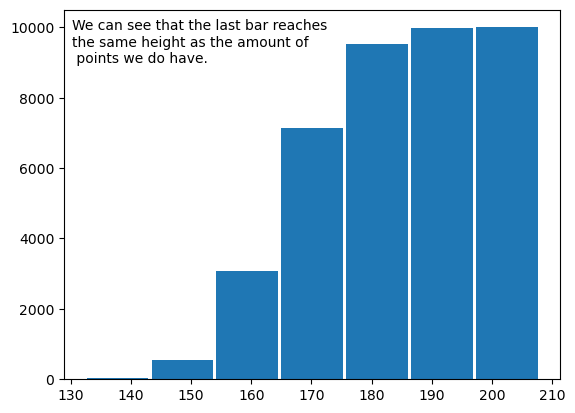

In [31]:
# We are going to have 10.000 data points.
mean = 170
std = 10
heights = generator.normal(mean, std, size = 10000)
num_bins = 7

fig = plt.figure()
fig, ax = plt.subplots(1,1)
ax.text(130.2, 9000, 'We can see that the last bar reaches\nthe same height as the amount of\n points we do have.')

_ =ax.hist(heights, bins = num_bins, rwidth = 0.95, cumulative = True)

#### <a id = 'dtcdf'>With density = True</a>
If `density` is set to `True`, then we would have the actual **CDF**. This is because, now, we are going to have the max_value equal to 1. This is because, `density = True` returns the **actual CDF**. Since CDF are all the possible probabilities, the **sum** of these must be one. 

Let's see the last example, this time with `density = True`.

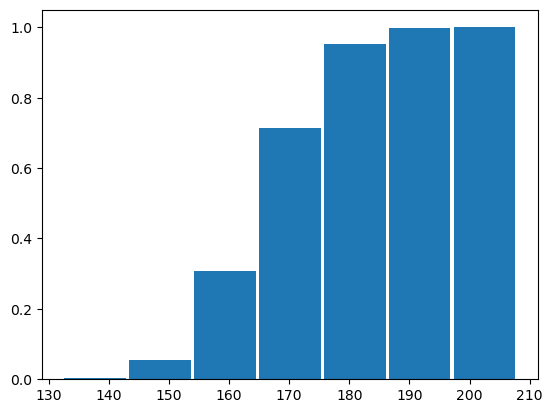

In [32]:
_ =plt.hist(heights, bins = num_bins, rwidth = 0.95, density = True, cumulative = True)

## <a id = 'OP'>Other Parameters</a>

### <a id = 'range'>range</a>
With this parameter you can bound your bins to be in a certain interval. It does not work if `bins` is a sequence (list), because if that's the case, you are already bounding your `bins`. This is used for when `bins` is an integer. Let's see an example:

<Figure size 640x480 with 0 Axes>

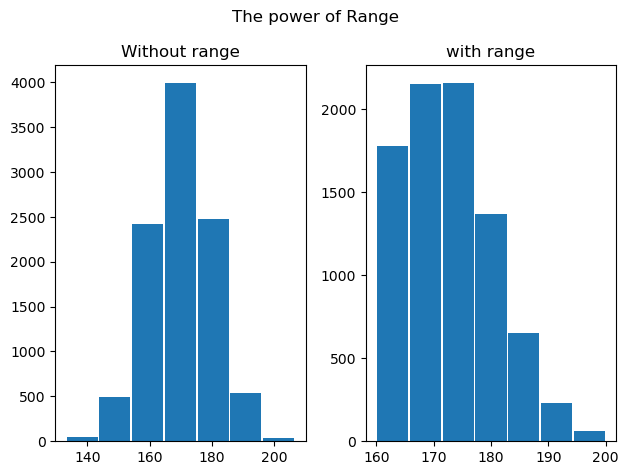

In [33]:
# In this example, we want to bound our bins to be in the interval [160, 200] referring to cm
mean = 170
std = 10
heights = generator.normal(mean, std, size = 10000)
num_bins = 7

fig = plt.figure()
fig, ax = plt.subplots(1, 2, tight_layout = True)

ax[0].set_title('Without range')
ax[0].hist(heights, bins = num_bins, rwidth = 0.95)

ax[1].set_title('with range')
ax[1].hist(heights, bins = num_bins, range = (160, 200), rwidth = 0.95)

fig.suptitle('The power of Range')

plt.show()

- Notice that data out of range is not being added to the interval's extremes. I mark this because we could think that the data of the heights that were lower to 160cm, were going to be added to left interval's extreme. But that does not happen. 


- Another thing we must notice, is that since some data is not being considered in the second plot, the `bins` from both plots are different.

### <a id = 'wrc'>width, rwidth & color</a>
Since these attributes are very simple, let's see them altogether:

- `width` sets the bar's width. There is no default value, since the bar's width depends on the bins.
- `rwidth` we've been using it throughout the notebook. It is used to make some space among bars in the histogram. Default value  is equal to 1 (i.e.  no separation).

- `color` sets the bar's color.

>**Note**: Only one color per dataset can be provided. You cannot plot each bar with a different color if all bars belog to the same dataset (which is what happens in the example below).

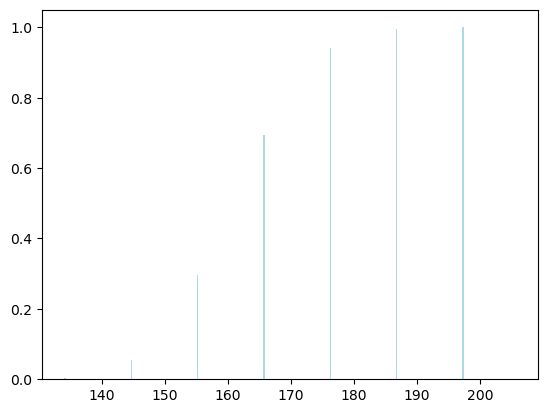

In [34]:
_ =plt.hist(heights, bins = num_bins, color = 'LightBlue', rwidth = 0.8, density = True, cumulative = True, width = 0.2)

###  <a id = 'kwargs'>Kwargs</a>

All possible attributes in `kwargs` can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch). We'll see the most important ones:
- `alpha` determines how opaque the bar's color is. $[0 \le \alpha \le 1]$
- `edgecolor (ec)` draws an edge around each bar with some color provided
- `linewidth (lw)` sets the edge's thickness
- `linestyle (ls)` set  the edge's style
- `facecolor (fc)` sets the bar's color (the same as `color` but if both attributes are set, `fc` prevails over `color`)

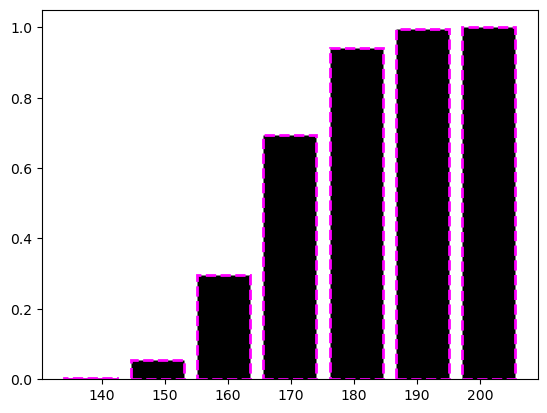

In [35]:
_ =plt.hist(heights, bins = num_bins, color = 'LightBlue', rwidth = 0.8, density = True, cumulative = True,
           ec = 'fuchsia', lw = 2, ls = '--', alpha = 1, fc = 'k')

### <a id = 'stacked'>stacked</a>
This attribute only makes sense if we have 2 or more datasets that we want to plot. Let's see a very simple example of two different normal distributions, and the difference between using `stacked = True` and `stacked = False`.

Text(0.5, 0.98, 'Stacked')

<Figure size 640x480 with 0 Axes>

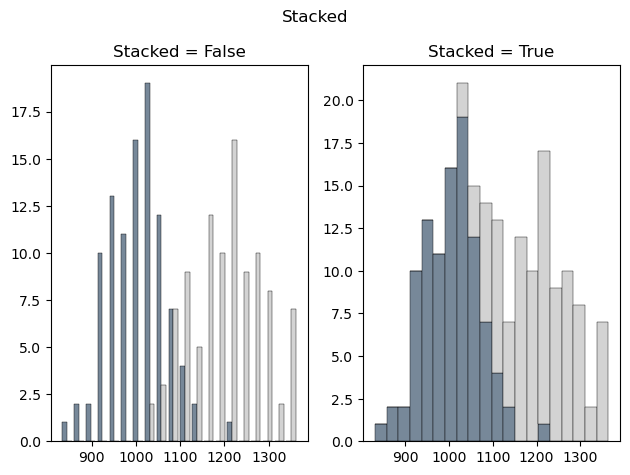

In [36]:
# loc = mean, scale = std
#dataset 1
distribution_1 = generator.normal(loc =  1000, scale = 70, size = 100)
#dataset 2
distribution_2 = generator.normal(loc = 1200, scale = 85, size = 100)
num_bins = 20
colors = ['LightSlateGray', 'LightGrey']

#plot
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, layout = 'tight')

ax1.set_title('Stacked = False')
ax1.hist([distribution_1, distribution_2], bins = num_bins, color = colors, ec = 'k', lw = 0.3)

ax2.set_title('Stacked = True')
ax2.hist([distribution_1, distribution_2], bins = num_bins, color = colors, ec = 'k', lw = 0.3, stacked = True)

fig.suptitle('Stacked')

Another way you could plot two dataset that overlap each other without using `stacked = True`, is using the attribute `alpha` we just saw before. 

Set different alpha values for each dataset. You are going to be able to 'see through the bars'. Let's look at this with an example.

Text(0.5, 1.0, 'using Alpha for plotting multiple datasets')

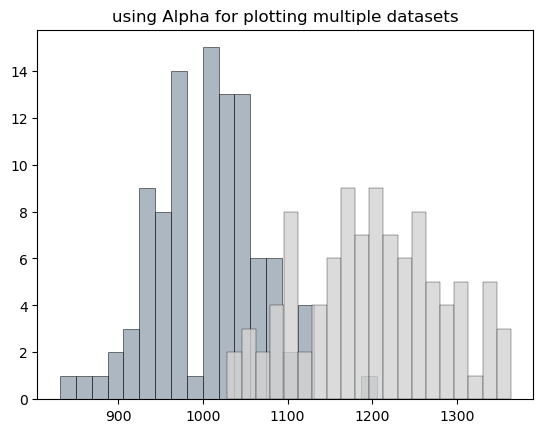

In [37]:
# same data from above 
plt.hist(distribution_1, bins = num_bins, color = colors[0], ec = 'k', lw = 0.6, alpha = 0.6)
plt.hist(distribution_2, bins = num_bins, color = colors[1], ec = 'k', lw = 0.3, alpha = 0.8)

plt.title("using Alpha for plotting multiple datasets")

## <a id = 'labels'>Labels</a>
There are two types of labels

#### <a id = 'llabels'>Legend labels</a>
When we talk about legend's labels, we are referring to labels as indentifiers for each dataset we are using to plot our data. 

Let's see these labels with the example from above.

Text(0.5, 0.98, 'Stacked')

<Figure size 640x480 with 0 Axes>

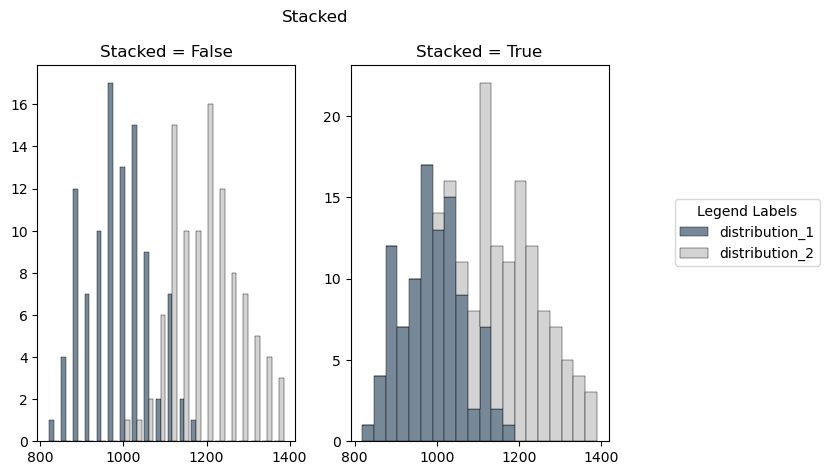

In [38]:
# loc = mean, scale = std
#dataset 1
distribution_1 = generator.normal(loc =  1000, scale = 70, size = 100)
#dataset 2
distribution_2 = generator.normal(loc = 1200, scale = 85, size = 100)
num_bins = 20
colors = ['LightSlateGray', 'LightGrey']

#plot
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, layout = 'tight')

ax1.set_title('Stacked = False')
ax1.hist([distribution_1, distribution_2], bins = num_bins, color = colors, ec = 'k', lw = 0.3)

ax2.set_title('Stacked = True')
ax2.hist([distribution_1, distribution_2], bins = num_bins, color = colors , ec = 'k', lw = 0.3, stacked = True)

labels = ['distribution_1', 'distribution_2']
fig.legend(ncol = 1, title = 'Legend Labels', labels = labels, bbox_to_anchor = (1.3, 0.6))
fig.suptitle('Stacked')

#### <a id = 'blabels'> Bar labels</a>
These are the labels we can place on top of each bar to give some quicker information. In order to set these labels, we are going to use the third tuple value returned by `plt.hist()`, (i.e. `p` of patches).

We are going to be passing `p` to `plt.bar_label()` function that is explained in the **bar notebook**.

>**Note**: `plt.bar_label` has some attributes that are not used here but are explained in the **bar notebook**. Some of them are very useful.

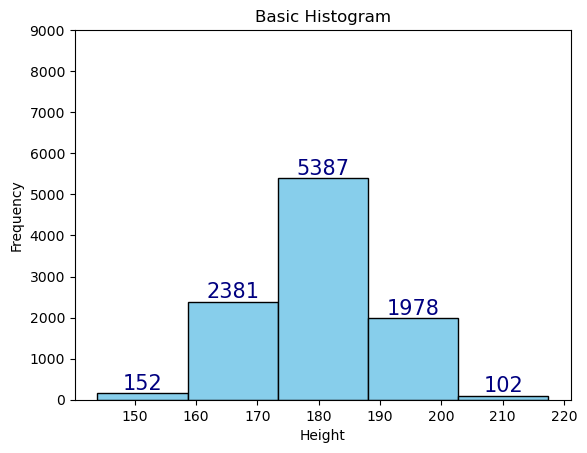

In [39]:
# First notebook's example

# the height will follow a normal distribution

# creating generator of a normal distribution with some mean and std
generator = np.random.default_rng()

#Generating data from generator
mean = 180
std = 10 
random_heights = generator.normal(mean, std, size = 10000)

#defining number of groups in which I'm going to group my data
num_bins = 5

#save our patch
_, _, p = plt.hist(random_heights, bins=num_bins, color='skyblue', edgecolor='black')

# we pass our patch to plt.bar_label() to place bar info on top of each bar.
plt.bar_label(p, fontsize = 15, color = 'navy')
# Adding labels and title
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.ylim(0, 9000)
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

## <a id = 'linechart'>Line Chart underlying histogram data</a>
We can plot a line chart to maybe see better the distribution. We are going to be using:
- `plt.plot()` to graph the line chart.


- `b` is the second tuple parameter that `plt.hist()` returns. `b` is needed for the x_axis for `plt.plot()`.

Text(0.5, 0.98, 'Line Chart with Histogram')

<Figure size 640x480 with 0 Axes>

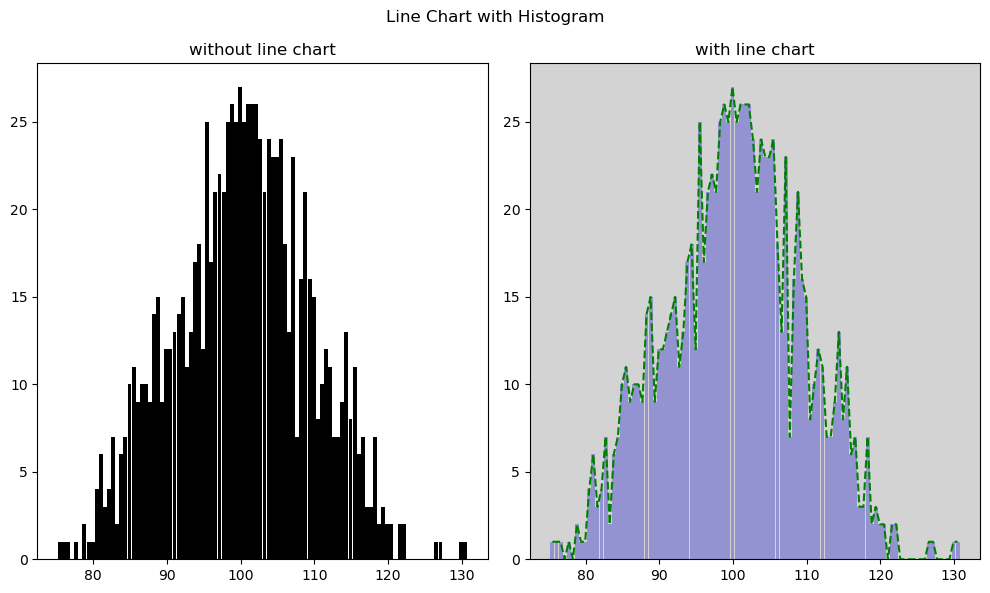

In [40]:
from scipy.stats import norm

mean = 100
std = 9
data = generator.normal(loc = mean, scale = std, size = (1000))
num_bins = 100

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, tight_layout = True, figsize = (10,6))

ax1.set_title('without line chart')
ax1.hist(data, bins = num_bins, rwidth = 0.96, color = 'k')

ax2.set_title('with line chart')
c, b, _ = ax2.hist(data, bins = num_bins, rwidth = 0.96, color = 'MediumBlue', alpha = 0.3)

bicenters = 0.5 *(b[1:] + b[:-1])
ax2.plot(bicenters, c, color = 'green', lw = 1.5, ls = '--')
ax2.set_facecolor('LightGrey')

fig.suptitle('Line Chart with Histogram')

> **Note**: This can be done much smoother with the library **Seaborn**.

## <a id = 'mark'>Marking the mean</a>
You can mark the mean, or any other thing we want in our histogram. This is done with the function `axvline()`. It is quite  simple. 

[]

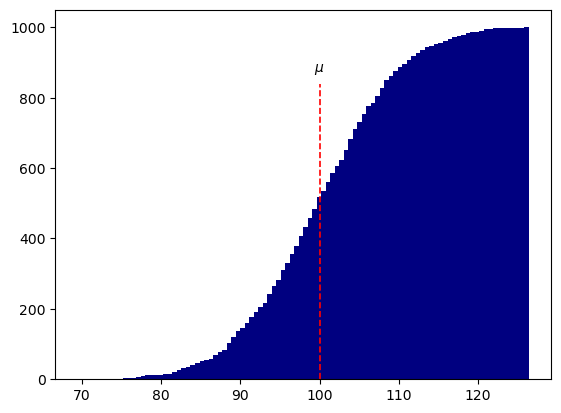

In [41]:
mean = 100
std = 9
data = generator.normal(loc = mean, scale = std, size = (1000))
num_bins = 100

plt.hist(data, num_bins, color = 'navy', cumulative = True)
plt.axvline(mean, ymax = 0.8, color = 'r', lw = 1.2, ls = '--')
plt.text(mean, 0.88 * len(data), r'$\mu$', ha = 'center', va = 'center')

plt.plot()

<p style="text-align:center"><b>This notebook has been done by:</b></p>
<p style="text-align:center"><i>Javier Coque</i></p>
<p style="text-align:center"><i>University of U-tad: Double Degree in software engineering and computational mathematics </i></p>

LinkedIn: <a href="https://www.linkedin.com/in/javier-coque-92b934278/">Javier Coque</a>